### Cats and Dogs Classifier using Convolutional Neural Networks

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls drive/MyDrive/CATS_DOGS.zip

drive/MyDrive/CATS_DOGS.zip


In [4]:
# libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('classic')

### Paths

In [5]:
# archive = '../Data/CATS_DOGS.zip' # local 
archive = 'drive/MyDrive/CATS_DOGS.zip' # colab

In [6]:
# unzipping 
import zipfile
zip_obj = zipfile.ZipFile(file=archive)

In [7]:
import os
if os.path.exists('drive/MyDrive/cd_data/'):
    print(True)
else:
    print(False)
    print(os.mkdir('drive/MyDrive/cd_data/'))
    print('created!')


False
None
created!


In [8]:
# # extract to the location

# # zip_obj.extractall('../Data/') # local 
zip_obj.extractall('drive/MyDrive/cd_data/') # colab

In [9]:
# train and validation paths 

# train_dir = '../Data/CATS_DOGS/train/'
# valid_dir = '../Data/CATS_DOGS/test/'

train_dir = 'drive/MyDrive/cd_data/CATS_DOGS/train/'
valid_dir = 'drive/MyDrive/cd_data/CATS_DOGS/test/'

### Raw Data

In [10]:
# random


# cat = '../Data/CATS_DOGS/train/CAT/100.jpg'
# dog = '../Data/CATS_DOGS/train/DOG/1050.jpg'

cat = 'drive/MyDrive/cd_data/CATS_DOGS/train/CAT/100.jpg'
dog = 'drive/MyDrive/cd_data/CATS_DOGS/train/DOG/1050.jpg'

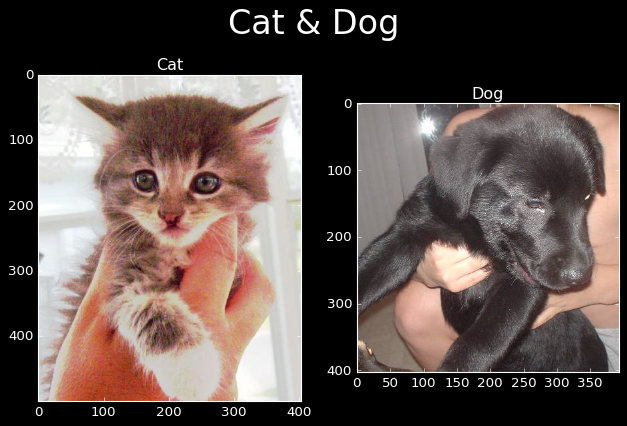

In [11]:
plt.style.use('dark_background')
from PIL import Image 
img_cat = Image.open(cat)
img_dog = Image.open(dog)
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.array(img_cat),label='cat')
axes[0].set_title('Cat')
axes[1].imshow(np.array(img_dog),label='dog')
axes[1].set_title('Dog')
fig.suptitle('Cat & Dog',size=30) 
fig.tight_layout()

In [12]:
'''
Through this random image selection and obseravtion, 
it is evident that shapes are not homogeneous;
'''


'\nThrough this random image selection and obseravtion, \nit is evident that shapes are not homogeneous;\n'

### Generators 

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [15]:
train_gen = ImageDataGenerator(rescale=1/255.)
val_gen = ImageDataGenerator(rescale=1/255.)

In [16]:
# both cats and dogs combined
train_generator = train_gen.flow_from_directory(train_dir,target_size=(128,128),batch_size=64,shuffle=True,class_mode='binary')
validation_generator = val_gen.flow_from_directory(valid_dir,target_size=(128,128),batch_size=64,shuffle=False,class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


Generators does almost everything that we need in a robust way by just parameterizing what we need. in this case because the image shapes where Heterogeneous in nature, we took a target size of 128,128 to transform every image into that size.

In [17]:
total_data = train_generator.samples + validation_generator.samples
print('Classes Include : ',train_generator.class_indices)
print('Train Samples : ', train_generator.samples)
print('Validation/Test Samples : ', validation_generator.samples)
print('Total Samples present (cats+dogs) : ', total_data)
print('Transformed Image shape : ',train_generator.image_shape)
print('Color Channels : (RGB)', train_generator.image_shape[2])

Classes Include :  {'CAT': 0, 'DOG': 1}
Train Samples :  18743
Validation/Test Samples :  6251
Total Samples present (cats+dogs) :  24994
Transformed Image shape :  (128, 128, 3)
Color Channels : (RGB) 3


### Ordinary Convolutional Neural Network Method 

In [18]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout

In [34]:
input_shape = train_generator.image_shape

net = Sequential()

#convnet

net.add(Conv2D(32, kernel_size=3,input_shape = train_generator.image_shape, activation='relu'))
net.add(MaxPooling2D(2,2))

net.add(Conv2D(64,(3,3), activation='relu'))
net.add(MaxPooling2D(2,2))

net.add(Conv2D(128, (3,3), activation='relu'))
net.add(MaxPooling2D(2,2))

net.add(Flatten())

net.add(Dense(512, activation='relu'))
net.add(Dense(1,activation='sigmoid'))



In [35]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
adam = tf.keras.optimizers.Adam(lr=0.001)

In [37]:
net.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
early_stop = EarlyStopping(patience=3)

In [39]:
import time

start = time.perf_counter()

perf = net.fit_generator(train_generator, epochs=15, callbacks=[early_stop],validation_data=validation_generator)

elapsed = time.perf_counter()- start 

print('Elapsed {}'.format(elapsed/60))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
  2/293 [..............................] - ETA: 1:07 - loss: 1.2549 - accuracy: 0.4570

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

293/293 [==============================] - 92s 312ms/step - loss: 0.6959 - accuracy: 0.5951 - val_loss: 0.5447 - val_accuracy: 0.7207
Epoch 2/15
293/293 [==============================] - 91s 310ms/step - loss: 0.5172 - accuracy: 0.7472 - val_loss: 0.4482 - val_accuracy: 0.7906
Epoch 3/15
293/293 [==============================] - 92s 313ms/step - loss: 0.4282 - accuracy: 0.8010 - val_loss: 0.4345 - val_accuracy: 0.7903
Epoch 4/15
293/293 [==============================] - 91s 310ms/step - loss: 0.3586 - accuracy: 0.8409 - val_loss: 0.3913 - val_accuracy: 0.8219
Epoch 5/15
293/293 [==============================] - 92s 313ms/step - loss: 0.3031 - accuracy: 0.8719 - val_loss: 0.3582 - val_accuracy: 0.8416
Epoch 6/15
293/293 [==============================] - 92s 314ms/step - loss: 0.2391 - accuracy: 0.9005 - val_loss: 0.4140 - val_accuracy: 0.8322
Epoch 7/15
293/293 [==============================] - 91s 310ms/step - loss: 0.1694 - accuracy: 0.9329 - val_loss: 0.3971 - val_accuracy: 0.8

In [40]:
loss, acc = net.evaluate_generator(validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [44]:
# validation Accuracy 
print('Validation Accuracy - {:.2f}%'.format(acc*100))
print('validation loss - {:.2f}'.format(loss))

Validation Accuracy - 83.75%
validation loss - 0.47


In [43]:
history = pd.DataFrame(perf.history)

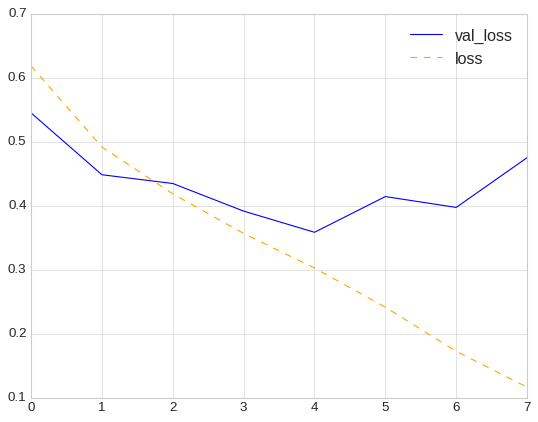

In [45]:
plt.style.use('seaborn-whitegrid')
plt.plot(history['val_loss'], ls='-',color='blue',label='val_loss')
plt.plot(history['loss'],ls='--',color='orange',label='loss' )
plt.legend()

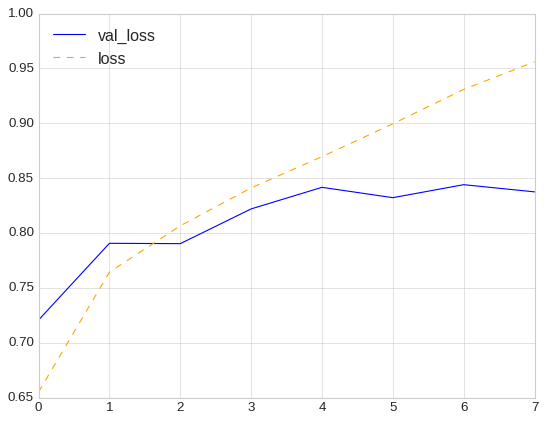

In [50]:
plt.style.use('seaborn-whitegrid')
plt.plot(history['val_accuracy'], ls='-',color='blue',label='val_loss')
plt.plot(history['accuracy'],ls='--',color='orange',label='loss' )
plt.legend(loc='upper left')

In [ ]:
# Classwise Evaluation

In [52]:
pred_probs = net.predict_generator(validation_generator)
preds = pred_probs > 0.5

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [53]:
preds

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(preds, validation_generator.classes))

              precision    recall  f1-score   support

       False       0.81      0.86      0.83      2952
        True       0.87      0.82      0.84      3299

    accuracy                           0.84      6251
   macro avg       0.84      0.84      0.84      6251
weighted avg       0.84      0.84      0.84      6251



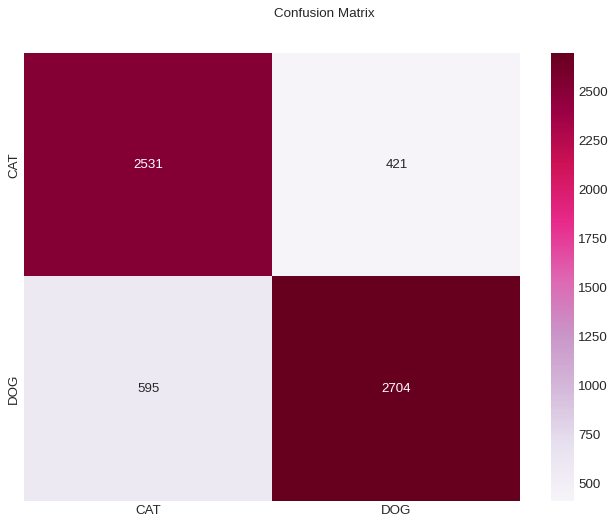

In [56]:
plt.figure(figsize=(10,7))
plt.suptitle('Confusion Matrix')
confmat = pd.DataFrame(confusion_matrix(preds, validation_generator.classes), columns=validation_generator.class_indices.keys())
confmat.index = validation_generator.class_indices.keys()
sns.heatmap(confmat, annot=True, fmt='d', cmap='PuRd')

The Classic case of Misclassifying dogs as cats and cats as dogs. the latter one is mostly happening i.cats as dogs classification 

In [94]:
net.save('CovnNet(cats&dogs).h5')

### Inference 
While the training Set Accuracy steadily increases till it reaches 90 the validation accuracy is stall at 80's, it is clearly the case of overfitting or high variance scenario. 

In [83]:
from tensorflow.keras.applications import MobileNetV2

In [84]:
train_generator.image_shape

(128, 128, 3)

In [85]:
conv_base = MobileNetV2(input_shape=train_generator.image_shape, include_top=False, weights='imagenet')

In [86]:
conv_base.trainable

True

In [87]:
# freezing layers 
conv_base.trainable= False 

In [88]:
conv_base.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [90]:
model = Sequential()

model.add(conv_base)

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_6 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               2621568   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 4,879,681
Trainable params: 2,621,697
Non-trainable params: 2,257,984
_________________________________________________________________


In [95]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [96]:
import time

start = time.perf_counter()

perf = model.fit_generator(train_generator, epochs=15, callbacks=[early_stop],validation_data=validation_generator)

elapsed = time.perf_counter()- start 

print('Elapsed {}'.format(elapsed/60))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
271/293 [==========================>...] - ETA: 5s - loss: 0.2902 - accuracy: 0.9396

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

293/293 [==============================] - 93s 309ms/step - loss: 0.2795 - accuracy: 0.9410 - val_loss: 0.0867 - val_accuracy: 0.9635
Epoch 2/15
293/293 [==============================] - 89s 303ms/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.0967 - val_accuracy: 0.9651
Epoch 3/15
293/293 [==============================] - 89s 303ms/step - loss: 0.0266 - accuracy: 0.9907 - val_loss: 0.1207 - val_accuracy: 0.9610
Epoch 4/15
293/293 [==============================] - 88s 302ms/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.1493 - val_accuracy: 0.9619
Elapsed 5.979793827750003


In [97]:
new_loss, new_acc = model.evaluate_generator(validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [98]:
print('Validation Accuracy - {:.2f}%'.format(new_acc*100))
print('validation loss - {:.2f}'.format(new_loss))

Validation Accuracy - 96.19%
validation loss - 0.15


In [99]:
model_history = pd.DataFrame(perf.history)

In [100]:
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.151495,0.958011,0.086692,0.963526
1,0.053979,0.979619,0.096691,0.965126
2,0.026196,0.990236,0.120692,0.960966
3,0.014898,0.994505,0.149257,0.961926


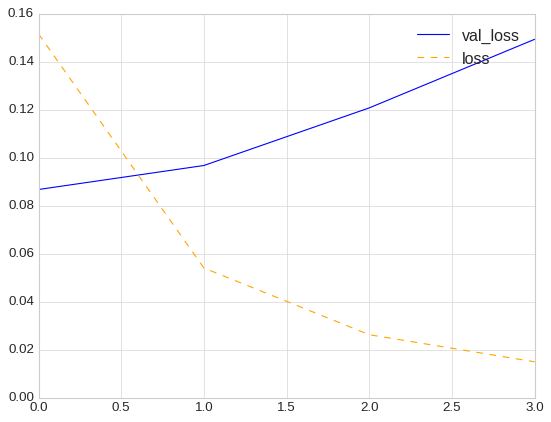

In [101]:
plt.style.use('seaborn-whitegrid')
plt.plot(model_history['val_loss'], ls='-',color='blue',label='val_loss')
plt.plot(model_history['loss'],ls='--',color='orange',label='loss' )
plt.legend()

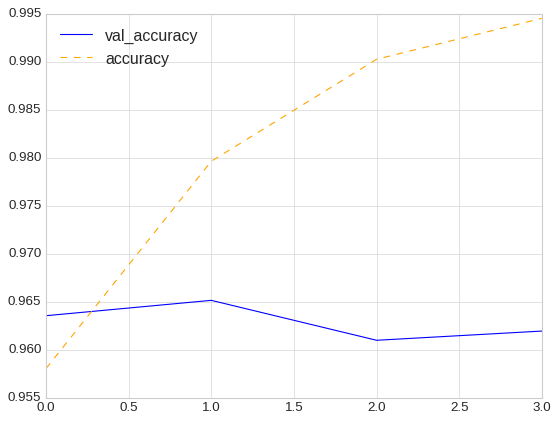

In [103]:
plt.style.use('seaborn-whitegrid')
plt.plot(model_history['val_accuracy'], ls='-',color='blue',label='val_accuracy')
plt.plot(model_history['accuracy'],ls='--',color='orange',label='accuracy' )
plt.legend(loc='upper left')

In [104]:
pred_probs = model.predict_generator(validation_generator)
preds = pred_probs > 0.5

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [105]:
print(classification_report(preds, validation_generator.classes))

              precision    recall  f1-score   support

       False       0.98      0.95      0.96      3236
        True       0.94      0.98      0.96      3015

    accuracy                           0.96      6251
   macro avg       0.96      0.96      0.96      6251
weighted avg       0.96      0.96      0.96      6251



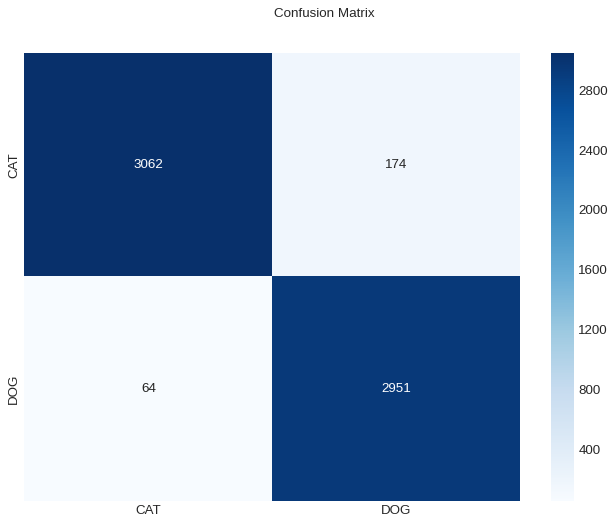

In [106]:
plt.figure(figsize=(10,7))
plt.suptitle('Confusion Matrix')
confmat = pd.DataFrame(confusion_matrix(preds, validation_generator.classes), columns=validation_generator.class_indices.keys())
confmat.index = validation_generator.class_indices.keys()
sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues')

# Inference-2

With **MobileNetV2** + custom output layer, the model achieved 99% on training set and 96% on the Validation Set, this difference indicates that the model is overfitting on the training set, but this is not prominent to finetune futher generally. But to create a state of the art cats & dogs classifier we can futhur fine-tune it to reduce that 3% of variance with techniques like Dropout and L2 Regularisation.  

In [107]:
model.save('Cats&Dogs-MovbileNetv2.h5')

## Miscellaneous 

In [108]:
import os
path = './samples/'
overview_path = './samples/overview.txt'
eval_path  = './samples/evaluate.txt'

if os.path.exists(path):

    print('samples dir, exists..checking for dictionaries existence..')

    if os.path.exists(overview_path) and os.path.exists(eval_path):
        print('Data exists. no need of overwritting.')
    else:
        print("overview and eval doesn't exist, proceed to step-2")

else:
    print("samples/ dir is non-existent, Establishing one..")
    os.mkdir(path) # samples directory 


samples/ dir is non-existent, Establishing one..


In [110]:
x_train, y_train = next(train_generator) # one batch 
x_test, y_test = next(validation_generator) # one batch

In [136]:
classes = np.array(list(validation_generator.class_indices))
x = np.array((x_train[0],x_train[7], x_train[10]))
y = np.array((y_train[0],y_train[7], y_train[10]))

In [147]:
y = ['CAT', 'DOG', 'CAT']

Text(0.5, 1.0, 'CAT')

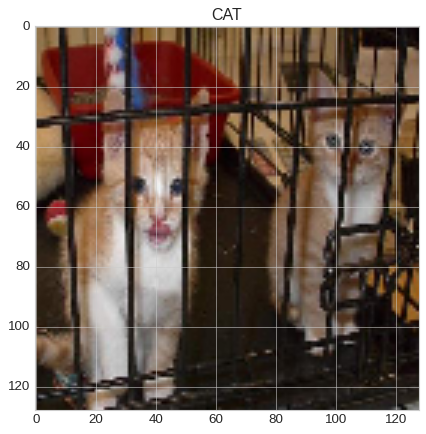

In [148]:
plt.imshow(x[2])
plt.title(y[2])

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.], dtype=float32)

In [157]:
overview_dict = {}
eval_dict = {}

# fill the following - 
# for overview
#string
kind = 'Image Data'
#tuple
dimensions = x_train.shape    
#labels : str(list of unique target values)
targets = list(validation_generator.class_indices.values())
#nd.array        
data = x
#nd.array or class_names
labels = y

vars0 = ['kind','dimensions', 'targets', 'data', 'labels']

# filling overview_dict 
for x in vars0:
    try:
        overview_dict[x] = eval(x)
    except:
        overview_dict[x] = x

# evaluate_dict 

eval_dict = {'test_cases' : x_train, 'true': y_train, 'class_names': ['CAT','DOG'] ,'model':'/model.h5'}

In [159]:
import pickle
# dump 1 
with open(overview_path,'wb') as f:
    pickle.dump(overview_dict,f)

# dump 2 
with open(eval_path,'wb') as f:
    pickle.dump(eval_dict,f)


In [160]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_6 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               2621568   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 4,879,681
Trainable params: 2,621,697
Non-trainable params: 2,257,984
_________________________________________________________________


In [161]:
s = '''
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_6 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               2621568   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
=================================================================
Total params: 4,879,681
Trainable params: 2,621,697
Non-trainable params: 2,257,984
_________________________________________________________________



'''

In [162]:
report = '''
              
              precision    recall  f1-score   support

       False       0.98      0.95      0.96      3236
        True       0.94      0.98      0.96      3015

    accuracy                           0.96      6251
   macro avg       0.96      0.96      0.96      6251
weighted avg       0.96      0.96      0.96      6251


'''

In [166]:
synopsis = '''

For this problem two Implementations were used with Two inferences at the end of each implementation

exe-1 = ConvNet from Scratch

* A ConvNet was built from scratch with 3 Conv2D, 3 MaxPool, 1 Flatten and 2 Dense Layers with Output function as Sigmoid ( you can find the implementation in the ipynb-pdf ). 
* This ConvNet was set for 15 epochs with EarlyStopping Callback of patience 3. The Elapsed Training time was 12.18 Mins on Cloud GPU instance of only 8 epochs of the stipulated 15.
* Attained Training Accuracy - 95.60% and Validation Accuracy - 83.75% with approx. 8% difference, This network was overfitting with an average f1-score of 84%.
* This Network had the classic case of misclassifying cats as dogs.

exe-2 = MobileNetv2 ( Frozen )

* Convbase of MobileNetV2 with ImageNet weights and Frozen layers was constructed.
* Custom Output layers of 1 Flatten, 2 Dense was attached at the end.
* Same as the previous implementation the model was set to 15 epochs with same EarlyStopping Setup. Elapsed Training time is 5 Mins with 3 Epochs of Training.
* This Time the Model Performed well enough with the pre-trained ImageNet Weights. The misclassification problem from the first case was smoothened. 
* With **MobileNetV2** + custom output layer, the model achieved 99% on training set and 96% on the Validation Set, this difference indicates that the model is overfitting on the training set, but this is not prominent to fine tune further generally. But to create a state of the art cats & dogs classifier we can futhur fine-tune it to reduce that 3% of variance with techniques like Dropout and L2 Regularisation.


'''

In [167]:
print(synopsis)



For this problem two Implementations were used with Two inferences at the end of each implementation

exe-1 = ConvNet from Scratch

* A ConvNet was built from scratch with 3 Conv2D, 3 MaxPool, 1 Flatten and 2 Dense Layers with Output function as Sigmoid ( you can find the implementation in the ipynb-pdf ). 
* This ConvNet was set for 15 epochs with EarlyStopping Callback of patience 3. The Elapsed Training time was 12.18 Mins on Cloud GPU instance of only 8 epochs of the stipulated 15.
* Attained Training Accuracy - 95.60% and Validation Accuracy - 83.75% with approx. 8% difference, This network was overfitting with an average f1-score of 84%.
* This Network had the classic case of misclassifying cats as dogs.

exe-2 = MobileNetv2 ( Frozen )

* Convbase of MobileNetV2 with ImageNet weights and Frozen layers was constructed.
* Custom Output layers of 1 Flatten, 2 Dense was attached at the end.
* Same as the previous implementation the model was set to 15 epochs with same EarlyStopping

In [170]:
desc = '''A simple Cats and Dogs Image Dataset with 24994 samples of both cats and dog pictures combined.'''
project_name = 'Cats & Dogs Classifier'
framework = 'Keras'
prediction_type = 'Classification of 2 Targets'
network_type = 'MobileNetV2'
architecture = s
layers = '19 Residual Units + 3 Custom Output Layers'
hidden_units = 2 
activations = "['relu', 'sigmoid']"
epochs = "Set of 15, Trained for 3 ( EarlyStopping ) "
metrics = "Accuracy"
loss = "Binary Cross-Entropy"
optimiser = 'Adam'
learning_rate = 0.001
batch_size = 64
train_performance = '99.45%'
test_performance = '96.14%'
classification_report = report
elapsed = "5Min, runtime : Colab Cloud GPU"
summary = synopsis
ipynb = './Projects/Transfer-Learning/Dogs&Cats/Dogs&Cats-classifier.pdf'
plots = './Projects/Transfer-Learning/Dogs&Cats/Plots'

In [184]:
p = {}

In [194]:
var = ['desc','project_name', 'framework','prediction_type','network_type','architecture','layers','hidden_units','activations','epochs','metrics','loss','optimiser','learning_rate','batch_size','train_performance','test_performance','classification_report','elapsed','summary','ipynb','plots']

param = {}
for val in var:

  try: 
      param[val] = eval(val)

  except:
      param[val] = val

    # check if anything is missing

In [195]:
param

{'activations': "['relu', 'sigmoid']",
 'architecture': '\nModel: "sequential_4"\n_________________________________________________________________\nLayer (type)                 Output Shape              Param #   \n=================================================================\nmobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   \n_________________________________________________________________\nflatten_6 (Flatten)          (None, 20480)             0         \n_________________________________________________________________\ndense_12 (Dense)             (None, 128)               2621568   \n_________________________________________________________________\ndense_13 (Dense)             (None, 1)                 129       \n=================================================================\nTotal params: 4,879,681\nTrainable params: 2,621,697\nNon-trainable params: 2,257,984\n_________________________________________________________________\n\n\n\n',
 'batch_size': 64,

In [196]:
import pickle
file = open("artefacts.txt", "wb") 
dictionary = param 
pickle.dump(dictionary, file) 
file.close() 